# AAG01 - Part 1

**Short Description:** Deploy two functions to plot CDFs and PMFs from both discrete and continuous samples

In [17]:
# Creating some example data to be used

# number of samples in a given dataset
# source: http://monografias.ice.ufjf.br/tcc-web/tcc?id=540 (page 25)
discrete_data = [150, 178, 846, 5473, 214, 2310, 990, 100]
data_set_number = list(range(1, len(discrete_data) + 1))
# average height of Brazilian people between 1810 and 1980 (in centimenters)
# source: https://ourworldindata.org/grapher/average-height-of-men-for-selected-countries?country=BRA
continuous_data = [164.3, 164.3, 164.8, 164.6, 164.5, 165, 166.5, 166.1, 167.1, 167.5, 166.5, 166.6, 167, 167.1, 168.2, 169, 171.6, 171.7]
height_year_list = [1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980]

In [18]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## Cumulative Distribution Function (CDF)

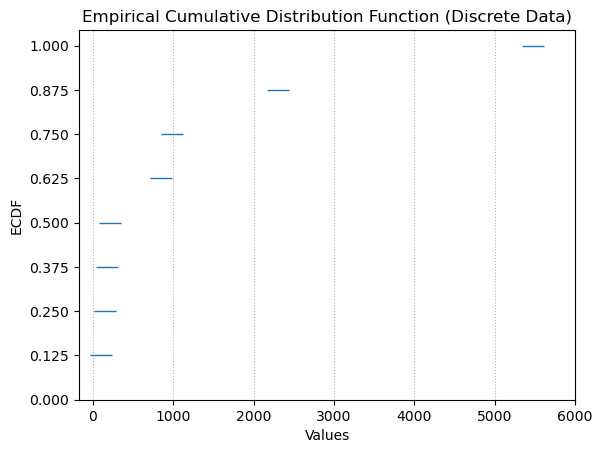

In [19]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = int(len(x))#.size
    y = np.arange(1, n+1) / n
    return(x,y)

# Generate CDF
x_std, y_std = ecdf(discrete_data)

# Plotting the ECDF
plt.plot(x_std, y_std, marker='_', linestyle='None', markersize=16)
plt.yticks(np.arange(0, max(y_std)+0.001, 1/len(discrete_data)))
plt.xticks(np.arange(0, max(x_std)+1000, 1000))
plt.xlabel('Values')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (Discrete Data)')
plt.grid(axis='x', linestyle=':') # add some lines to enhance visualization

plt.show()

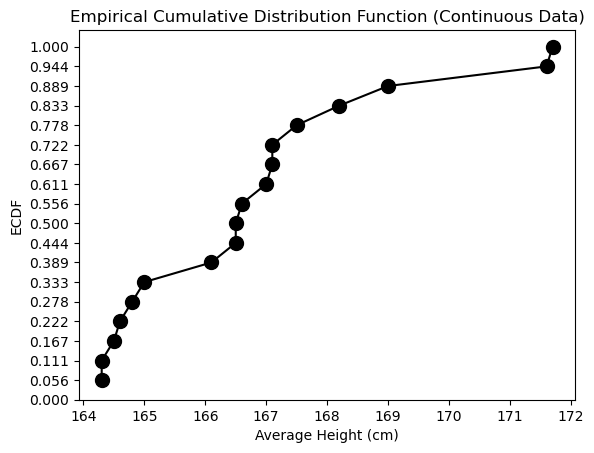

In [20]:
# Generate other CDF
x_std2, y_std2 = ecdf(continuous_data)

# Plotting the ECDF
plt.plot(x_std2, y_std2, marker='o', linestyle='-', color='black', markersize=10)
# plt.xticks(x_std2.pop(), x_std2)
# plt.xticks(continuous_data)
plt.yticks(np.arange(0, max(y_std2)+0.001, 1/len(continuous_data)))
plt.xlabel('Average Height (cm)')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (Continuous Data)')

plt.show()

## Probability Mass Function (PMF)

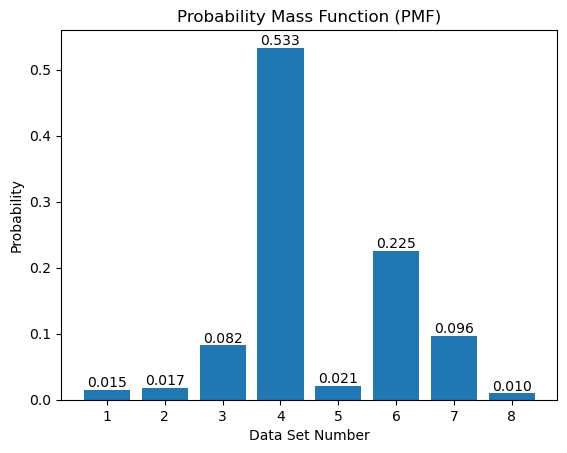

In [21]:
def plot_pmf(data): 
    # Calculate PMF
    total_samples = sum(data)
    pmf = [count / total_samples for count in data]

    # Plot PMF
    plt.bar(range(1, len(data) + 1), pmf)
    plt.xlabel('Data Set Number')
    plt.ylabel('Probability')
    plt.title('Probability Mass Function (PMF)')

    # Add labels on top of each bar
    for i, prob in enumerate(pmf):
        plt.text(i + 1, prob, f'{prob:.3f}', ha='center', va='bottom')

    plt.show()

plot_pmf(discrete_data) # plot the PMF for the discrete data

## Comments

### Cumulative Distribution Function (CDF)

It is crucial to understand the difference between a CDF and an ECDF (Empirical CDF). While a CDF can use synthetically generated or created data as input, an ECDF utilizes empirical data. The type of data being represented is determined by the continuous variable's graph with a curve and the discrete variable's representation through data points. Smoothing procedures are usually avoided in the presented data.

The default behavior of CDF-based functions involves adding up the probability of each previous event to the current one, repeating this for all events.

### Probability Mass Function (PMF)

PMFs are only applicable to discrete variables. The graph depicts the possibility of drawing a sample from each set within the entire dataset, using the number of samples available for each set.

The default behavior of PMF-based functions is to represent the probability of individual events separately

# AAG01 - Part 2

**Short Description:** Repeat the same from the first part but now using Python library functions. After plotting CDFs and PMFs, plot PDFs from both discrete and continuous samples too

In [22]:
# Imports
import seaborn as sns
import pandas as pd
import warnings;
warnings.filterwarnings('ignore'); # disable warnings

In [23]:
# Transform the data to a df so it will be easily loaded on Seaborn
d1 = {'num_dataset':data_set_number, 'num_samples':discrete_data}
df_discrete = pd.DataFrame(d1)

d2 = {'year':height_year_list, 'avg_height':continuous_data}
df_continuous = pd.DataFrame(d2)

# preview the data
print(df_discrete.head(), "\n", df_continuous.head())


   num_dataset  num_samples
0            1          150
1            2          178
2            3          846
3            4         5473
4            5          214 
    year  avg_height
0  1810       164.3
1  1820       164.3
2  1830       164.8
3  1840       164.6
4  1850       164.5


## Empirical Cumulative Distribution Function (ECDF)

Text(0.5, 1.0, 'PDF (Continuous Data)')

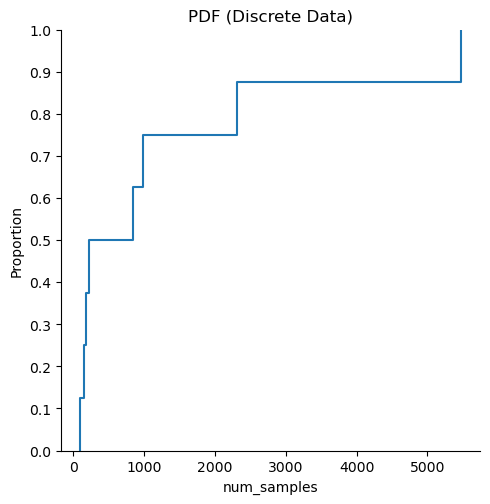

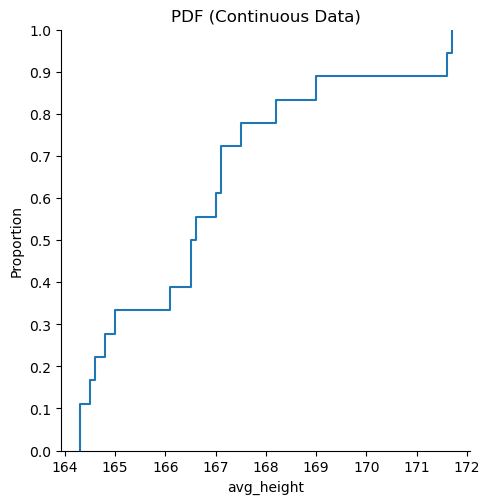

In [24]:
sns.displot(df_discrete, x="num_samples", kind="ecdf")
plt.yticks(np.arange(0, 1.1, step=0.1)) #adjust Y-axis values
plt.title("PDF (Discrete Data)")
sns.displot(df_continuous, x="avg_height", kind="ecdf")
plt.yticks(np.arange(0, 1.1, step=0.1)) #adjust Y-axis values
plt.title("PDF (Continuous Data)")

## Probability Mass Function (PMF)

<Axes: title={'center': 'PMF (Discrete Data)'}, xlabel='num_samples', ylabel='Probability'>

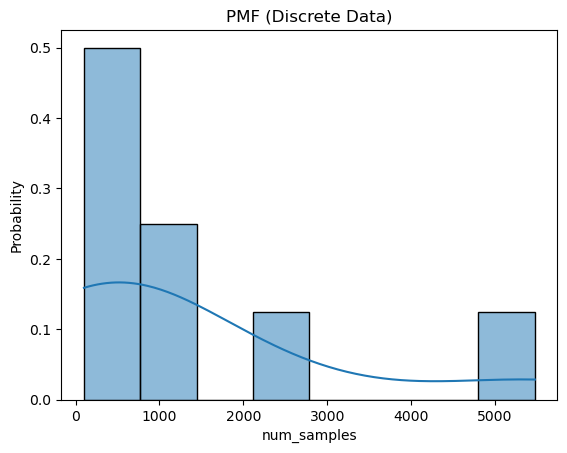

In [25]:
plt.title("PMF (Discrete Data)")
sns.histplot(df_discrete["num_samples"], kde=True, stat="probability", bins=len(df_discrete))

## Probability Density Function (PDF)

<Axes: title={'center': 'PDF (Discrete Data)'}, xlabel='num_samples', ylabel='Density'>

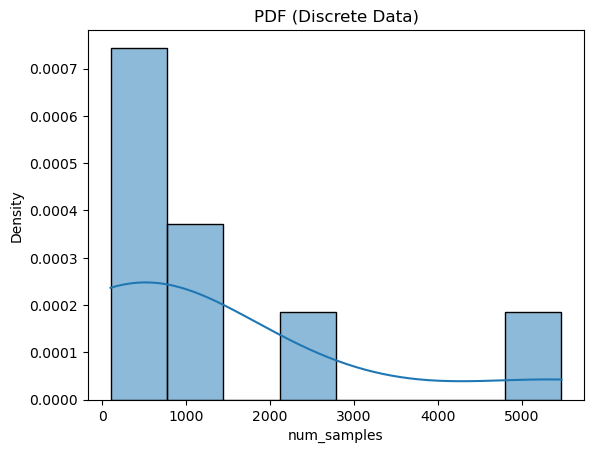

In [26]:
plt.title("PDF (Discrete Data)")
sns.histplot(df_discrete["num_samples"], kde=True, stat="density", bins=len(df_discrete))

<Axes: title={'center': 'PDF (Continuous Data)'}, xlabel='avg_height', ylabel='Density'>

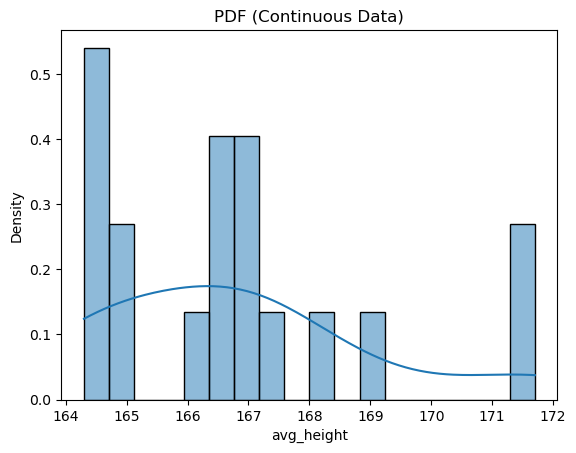

In [27]:
plt.title("PDF (Continuous Data)")
sns.histplot(df_continuous["avg_height"], kde=True, stat="density", bins=len(df_continuous))